# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

# Engenheiro de Aprendizado de Máquina Nanodegree
## Aprendizagem não supervisionada
## Projeto: Criando Segmentos de Clientes

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.


Bem-vindo ao terceiro projeto do Nanodegree Engineer Machine Learning! Neste caderno, algum código modelo já foi fornecido para você, e será seu trabalho implementar a funcionalidade adicional necessária para concluir com êxito este projeto. As seções que começam com **'Implementação'** no cabeçalho indicam que o seguinte bloco de código exigirá uma funcionalidade adicional que você deve fornecer. Serão fornecidas instruções para cada seção e as especificidades da implementação serão marcadas no bloco de códigos com uma instrução `'TODO'`. Por favor, leia atentamente as instruções!

Além de implementar o código, haverá perguntas que você deve responder relacionadas ao projeto e à sua implementação. Cada seção onde você responderá uma questão é precedida por um cabeçalho **'Question X'**. Leia atentamente cada pergunta e forneça respostas completas nas seguintes caixas de texto que começam com **'Resposta:'**. A submissão do seu projeto será avaliada com base nas suas respostas para cada uma das perguntas e na implementação que você fornecer.

>**Nota:** As células Code e Markdown podem ser executadas usando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas clicando duas vezes na célula para entrar no modo de edição.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.


## Começando

Neste projeto, você analisará um conjunto de dados contendo dados sobre os valores de gastos anuais de vários clientes (informados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um dos objetivos deste projeto é descrever melhor a variação nos diferentes tipos de clientes com os quais um distribuidor atacadista interage. Isso daria ao distribuidor informações sobre a melhor forma de estruturar seu serviço de entrega para atender às necessidades de cada cliente.

O conjunto de dados para este projeto pode ser encontrado no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para os propósitos deste projeto, os recursos `'Channel'` e `'Region'` serão excluídos na análise - com foco nas seis categorias de produtos registradas para os clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes de atacado, juntamente com algumas das bibliotecas necessárias do Python necessárias para este projeto. Você saberá que o conjunto de dados foi carregado com êxito se o tamanho do conjunto de dados for relatado.


In [1]:
# Importar bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
from IPython.display import display # Permite o uso de display () para DataFrames

# Importar código de visualizações suplementares visuals.py
import visuals as vs

# Exibição bonita para notebooks
%matplotlib inline

# Carregar o conjunto de dados de clientes atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("O conjunto de dados de clientes do atacado possui {} amostras com {} recursos cada.". format (*data.shape))
except:
    print("O conjunto de dados não pôde ser carregado. O conjunto de dados está ausente?")

O conjunto de dados de clientes do atacado possui 440 amostras com 6 recursos cada.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

## Exploração de dados
Nesta seção, você começará a explorar os dados por meio de visualizações e códigos para entender como cada recurso está relacionado aos outros. Você observará uma descrição estatística do conjunto de dados, considerará a relevância de cada recurso e selecionará alguns pontos de dados de amostra do conjunto de dados que você acompanhará no decorrer deste projeto.

Execute o bloco de código abaixo para observar uma descrição estatística do conjunto de dados. Observe que o conjunto de dados é composto por seis categorias de produtos importantes: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'**. Considere o que cada categoria representa em termos de produtos que você pode comprar.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

### Implementação: Selecionando Amostras
Para entender melhor os clientes e como os dados serão transformados por meio da análise, seria melhor selecionar alguns pontos de dados de amostra e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha à lista de 'índices' que representará os clientes a rastrear. Sugerimos que você experimente diferentes conjuntos de amostras até obter clientes que variam significativamente um do outro.

In [3]:
# TODO: selecione três índices de sua escolha que você deseja usar como amostra do conjunto de dados
indices = [1,3,7]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,13265,1196,4221,6404,507,1788
2,7579,4956,9426,1669,3321,2566


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


### Questão 1
Considere o custo total de compra de cada categoria de produto e a descrição estatística do conjunto de dados acima para seus clientes de amostra.

* Que tipo de estabelecimento (cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés, lanchonetes, varejistas no atacado, entre muitos outros. Evite usar nomes para estabelecimentos, como dizer *"McDonalds"* ao descrever um cliente exemplar como um restaurante. Você pode usar os valores médios para referência para comparar suas amostras. Os valores médios são os seguintes:

* Frescos: 12000,2977
* Leite: 5796,2
* Mercearia: 7951.3
* Papel de detergentes: 2881.4
* Delicatessen: 1524,8

Sabendo disso, como suas amostras se comparam? Isso ajuda na condução de sua visão sobre que tipo de estabelecimentos eles podem ser?

**Answer:**
A remoção dos dados é justificada com base na descrição estatística dos dados, pois ao analisar a tabela abaixo, nota-se que os dados possuem diferenças significativas na média e desvio padrão, comparando o quanto gasta cada amostra coma cada categoria de produtos, em relação a média, nota-se que:
A primeira amostra gasta mais com laticinios e mercearia, portanto deve ser um super-mercado.
A segunda amostra gasta mais com em produtos frescos,detergentes e produtos de papel, portanto deve ser uma quitanda.
A terceira amostra gasta mais com em laticinios e charcutaria, portanto deve ser um estabelecimento que vende produtos de charcutaria.

In [4]:
display(samples.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,9300.333333,5320.666667,7738.333333,3278.333333,2373.666667,2043.333333
std,3443.407808,4318.562878,3046.927359,2707.306103,1616.641374,452.682376
min,7057.000000,1196.000000,4221.000000,1669.000000,507.000000,1776.000000
25%,7318.000000,3076.000000,6823.500000,1715.500000,1900.000000,1782.000000
50%,7579.000000,4956.000000,9426.000000,1762.000000,3293.000000,1788.000000
75%,10422.000000,7383.000000,9497.000000,4083.000000,3307.000000,2177.000000
max,13265.000000,9810.000000,9568.000000,6404.000000,3321.000000,2566.000000


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.
 
### Implementação: Relevância do Recurso
Um pensamento interessante a considerar é se uma (ou mais) das seis categorias de produtos é realmente relevante para entender a compra do cliente. Ou seja, é possível determinar se os clientes que compram alguma quantidade de uma categoria de produtos necessariamente comprarão alguma quantidade proporcional de outra categoria de produtos? Podemos fazer essa determinação com bastante facilidade treinando um modelo de regressão supervisionado em um subconjunto dos dados com um recurso removido e, em seguida, pontuar o quão bem esse modelo pode prever o recurso removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` uma cópia dos dados removendo um recurso de sua escolha usando a função` DataFrame.drop`.
 - Use `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e testes.
   - Use o recurso removido como seu marcador de destino. Defina um `test_size` de` 0.25` e defina um `random_state`.
 - Importe um regressor de árvore de decisão, defina um `random_state` e ajuste o aprendiz aos dados de treinamento.
 - Relate a pontuação de previsão do conjunto de testes usando a função `score` do regressor.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Faça uma cópia do DataFrame, usando a função 'drop' para descartar o recurso fornecido
new_data = data.drop('Fresh', axis = 1, inplace = False)
# TODO: Divida os dados em conjuntos de treinamento e teste (0,25) usando o recurso determinado como o destino
# Definir um estado aleatório.
X_train, X_test, y_train, y_test = train_test_split(data, new_data, test_size=0.25, random_state=42)

# TODO: crie um regressor de árvore de decisão e ajuste-o ao conjunto de treinamento
regressor = DecisionTreeRegressor(random_state=30).fit(X_train,y_train)

# TODO: Relate a pontuação da previsão usando o conjunto de testes
score = regressor.score(X_test,y_test)

In [6]:
print('O score com o recurso fresh removido foi de ',score)

O score com o recurso fresh removido foi de  0.8186561039603248


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.


### Questão 2

* Qual recurso você tentou prever?
* Qual foi o escore de previsão relatado?
* Esse recurso é necessário para identificar os hábitos de consumo dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo implica que o modelo não consegue ajustar os dados. Se você obtiver uma pontuação baixa para um determinado recurso, isso nos levará a acreditar que esse ponto de recurso é difícil de prever usando os outros recursos, tornando-o um recurso importante a ser considerado ao considerar a relevância.


**Answer:** O recurso que tentei prever foi o Fresh, com um score de 0.8187, bom, como foi possível conseguir uma boa pontuação score sem esse recurso, podemos presumir que esse recurso não é muito relevante, portante ele não é necessário.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

### Visualize distribuições de recursos
Para entender melhor o conjunto de dados, podemos construir uma matriz de dispersão de cada uma das seis características do produto presentes nos dados. Se você descobriu que o recurso que você tentou prever acima é relevante para identificar um cliente específico, a matriz de dispersão abaixo pode não mostrar qualquer correlação entre esse recurso e os outros. Por outro lado, se você acredita que o recurso não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma correlação entre esse recurso e outro recurso nos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

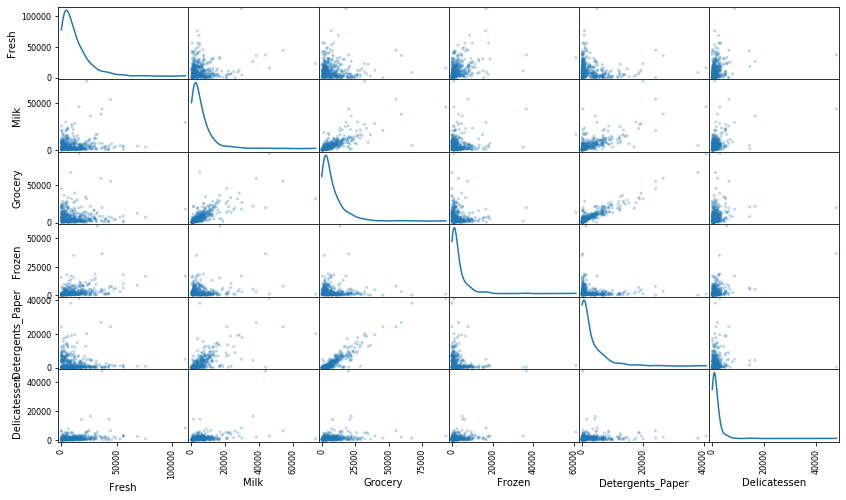

In [7]:
# Produce a scatter matrix for each pair of features in the data
# Produzir uma matriz de dispersão para cada par de recursos nos dados
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.


### Questão 3
* Utilizando a matriz de dispersão como referência, discuta a distribuição do conjunto de dados, especificamente fale sobre a normalidade, outliers, grande número de pontos de dados próximos a 0 entre outros. Se você precisar separar alguns dos gráficos individualmente para acentuar ainda mais o seu ponto, também poderá fazê-lo.
* Existem pares de características que exibem algum grau de correlação?
* Isso confirma ou nega suas suspeitas sobre a relevância do recurso que você tentou prever?
* Como os dados desses recursos são distribuídos?

**Dica:** Os dados são normalmente distribuídos? Onde a maioria dos pontos de dados está? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para obter as correlações de recursos e, em seguida, visualizá-las usando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)( Os dados que seriam alimentados no mapa de calor seriam os valores de correlação, por exemplo: `data.corr()`) para obter mais informações.

**Answer:**

1) A análise da matriz de dispersão mostrou que os dados parecem estar distribuídos normalmente, porque a média, a mediana e o desvio padrão variarem significativamente, indicando que existe uma grande inclinação, todos os recursos possuem outliers principalmente fresh', 'milk', 'grocery, é interessante notar que grande parte dos dados parecem estar próximos de 0 indicando que existem correlações entre as variáveis somente em alguns pontos.

2) A análise da matriz de dispersão mostra que existe uma correlação entre o recurso fresh e os demais recursos no conjunto de dados, principalmente com os recursos milk, grocery, frozen, detergents_paper, os recursos milk e grocery também possuem uma correlação significativa com outros recursos, embora menor que fresh e o recurso delicatessen é o que possui menor correlação entre todos.

3) Isso confirma minha suspeita que esse recurso não é muito relevante.

4) A analise do mapa de calor plotado abaixo, confirma a suspeita de que os dados não estão distribuidos normalmente, pois os dados não obedecem o padrão de uma distribuição normal

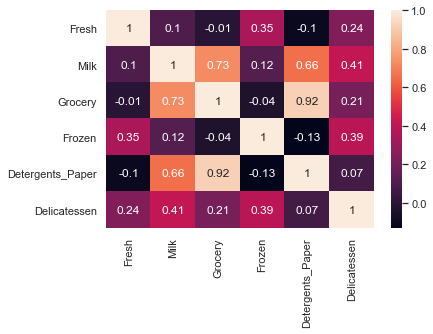

In [8]:
import seaborn as sns; sns.set()

sns.heatmap(data.corr().round(2),annot=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

## Pré-processamento de dados
Nesta seção, você pré-processará os dados para criar uma representação melhor dos clientes, executando um dimensionamento nos dados e detectando (e removendo opcionalmente) os valores discrepantes. Os dados de pré-processamento costumam ser um passo crítico para garantir que os resultados obtidos em sua análise sejam significativos e significativos.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.
 
### Implementação: dimensionamento de recursos
Se os dados não forem distribuídos normalmente, especialmente se a média e a mediana variarem significativamente (indicando uma grande inclinação), é mais [frequentemente apropriado](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) para aplicar uma escala não linear - particularmente para dados financeiros. Uma forma de obter esse escalonamento é usar um [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula a melhor transformação de potência dos dados que reduz a assimetria. Uma abordagem mais simples, que pode funcionar na maioria dos casos, seria aplicar o logaritmo natural.

No bloco de código abaixo, você precisará implementar o seguinte:
  - Atribuir uma cópia dos dados para `log_data` depois de aplicar a escala logarítmica. Use a função `np.log` para isso.
  - Atribuir uma cópia dos dados de amostra para `log_samples` depois de aplicar a escala logarítmica. Novamente, use `np.log`.


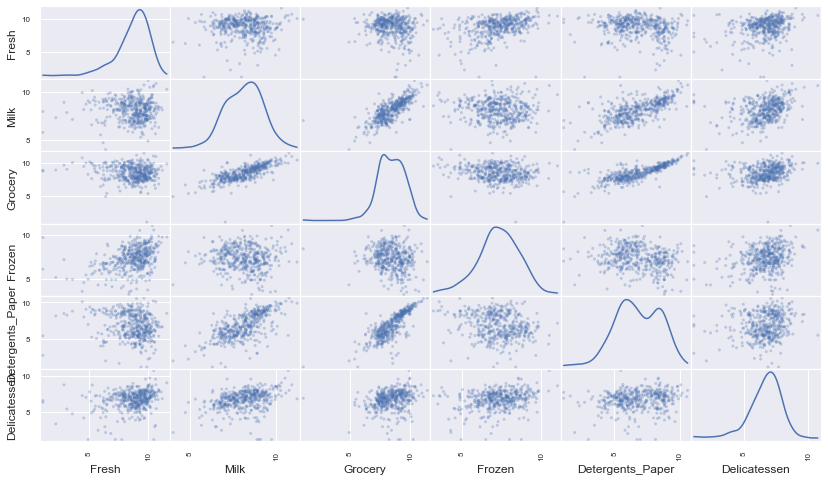

In [9]:
# TODO: dimensionar os dados usando o logaritmo natural
log_data = np.log(data)

# TODO: dimensionar os dados de amostra usando o logaritmo natural
log_samples = np.log(samples)

# Produzir uma matriz de dispersão para cada par de recursos recém-transformados
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

### Observação
Depois de aplicar uma escala de logaritmo natural aos dados, a distribuição de cada recurso deve parecer muito mais normal. Para quaisquer pares de recursos que você possa ter identificado anteriormente como correlacionados, observe se essa correlação ainda está presente (e se agora está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como os dados de amostra foram alterados depois de ter o logaritmo natural aplicado a ele.

A correlação ainda existe e ainda é mais intensa que nos outros recursos

In [10]:
# Display the log-transformed sample data
# Exibe os dados de amostra transformados em log
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
2,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.


### Implementação: Detecção de Outliers
Detectar outliers nos dados é extremamente importante na etapa de pré-processamento de dados de qualquer análise. A presença de outliers pode frequentemente distorcer resultados que levam em consideração esses pontos de dados. Existem muitas "regras práticas" para o que constitui um outlier em um conjunto de dados. Aqui, usaremos o [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo de outlier* é calculado como 1,5 vezes o intervalo interquartílico (IQR). Um ponto de dados com um recurso que está além de uma etapa de outlier fora do IQR para esse recurso é considerado anormal.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribua o valor do 25º percentil para o recurso dado a `Q1`. Use `np.percentile` para isso.
 - Atribuir o valor do 75º percentil para o recurso fornecido a `Q3`. Novamente, use `np.percentile`.
 - Atribuir o cálculo de um passo outlier para o recurso dado ao `step`.
 - Opcionalmente, remova os pontos de dados do conjunto de dados adicionando índices à lista `outliers`.

**OBSERVAÇÃO:** Se você optar por remover quaisquer valores discrepantes, verifique se os dados de amostra não contêm nenhum desses pontos!
Depois de executar esta implementação, o conjunto de dados será armazenado na variável `good_data`.

In [11]:
outliers=[]
#Para cada recurso, encontre os pontos de dados com valores extremos altos ou baixos
for feature in log_data.keys():
    #TODO: Calcular Q1 (25º percentil dos dados) para o recurso fornecido
    Q1 = np.percentile(log_data[feature],25)
    #TODO: Calcular Q3 (75º percentil dos dados) para o recurso fornecido
    Q3 = np.percentile(log_data[feature],75)
    #TODO: use o intervalo interquartil para calcular um passo de discrepância (1,5 vezes o intervalo interquartil)
    step = 1.5*(Q3 - Q1)
    #Exibir os outliers
    print("Pontos de dados considerados outliers para o recurso '{}':".format(feature))
    delete=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(delete)
    outliers+=list(delete.index)
    
    
# OPTIONAL: Selecione os índices para os pontos de dados que você deseja remover
#outliers = [65,66,81,95,128,171,193,218,304,305,338,353,355,357,412,86,98,154,356,75,154,38,57,65,14,175,264,325,420,429,439,75,161,66,109,128,137,142,154,183,184,187,203,233,285,289,343]

# Remova os outliers, se houver algum especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)  

Pontos de dados considerados outliers para o recurso 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Pontos de dados considerados outliers para o recurso 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Pontos de dados considerados outliers para o recurso 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Pontos de dados considerados outliers para o recurso 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Pontos de dados considerados outliers para o recurso 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Pontos de dados considerados outliers para o recurso 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

**Hint:** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

### Questão 4
* Existem pontos de dados considerados outliers para mais de um recurso com base na definição acima?
* Esses pontos de dados devem ser removidos do conjunto de dados?
* Se algum ponto de dados foi adicionado à lista `outliers` a ser removida, explique o porquê.

**Dica:** Se você tiver pontos de dados que são discrepantes em várias categorias, pense em por que isso pode acontecer e se eles justificarem a remoção. Observe também como o k-means é afetado por outliers e se isso afeta ou não a sua análise de removê-los ou não.

**Answer:**
1) Sim, existem pontos de dados considerados outliers para vários recursos com base na definição acima

2) Sim, esses pontos de dados devem ser removidos do conjunto de dados, e de fato eu removi

3) Todos os outliers foram removidos, e o motivo é simples, eles se enquadram na definição de outliers acima, ou seja estão entre Q1-step e Q3+step, não existem pontos de dados que são discrepantes em várias categorias, se isso acontecesse a remoção seria mais que justificada, de fato a remoção de outliers afeta positivamente a análise.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

## Transformação de recursos
Nesta seção, você usará a análise de componentes principais (PCA) para tirar conclusões sobre a estrutura subjacente dos dados do cliente de atacado. Como o uso do PCA em um conjunto de dados calcula as dimensões que melhor maximizam a variancia, descobriremos quais combinações compostas de recursos descrevem melhor os clientes.


### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.
 
### Implementação: PCA

Agora que os dados foram dimensionados para uma distribuição mais normal e tiveram os valores discrepantes necessários removidos, agora podemos aplicar o PCA ao `good_data` para descobrir quais dimensões sobre os dados que melhoram a variancia dos recursos envolvidos. Além de encontrar essas dimensões, o PCA também relatará *a razão de variância* explicada de cada dimensão - quanta variação dentro dos dados é explicada apenas por essa dimensão. Observe que um componente (dimensão) do PCA pode ser considerado um novo "recurso" do espaço, no entanto, é uma composição dos recursos originais presentes nos dados.

No bloco de código abaixo, você precisará implementar o seguinte:
  - Importe `sklearn.decomposition.PCA` e atribua os resultados do ajuste do PCA em seis dimensões com `good_data` para `pca`.
  - Aplique uma transformação PCA de `log_samples` usando `pca.transform` e atribua os resultados a `pca_samples`.


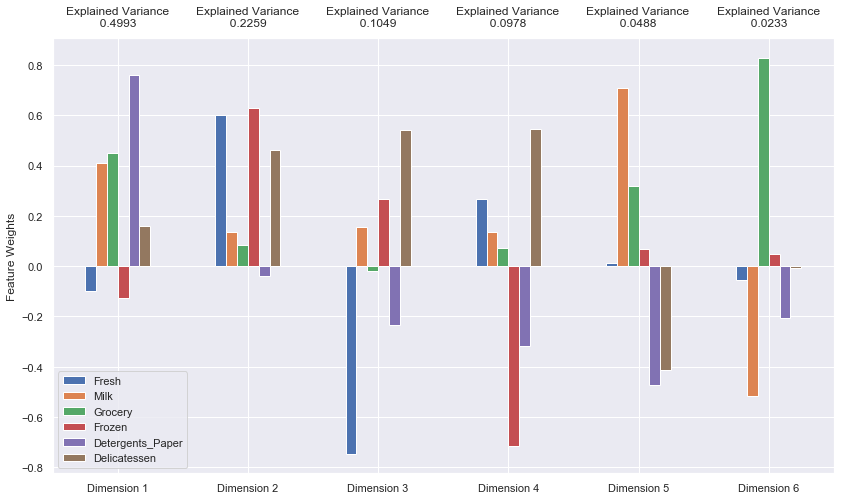

In [12]:
from sklearn.decomposition import PCA
# TODO: aplicar o PCA ajustando os dados válidos com o mesmo número de dimensões que os recursos
n_components=6
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(good_data)
# TODO: Transforme log_samples usando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Gerar gráfico de resultados do PCA
pca_results = vs.pca_results(good_data, pca)

### Question 5

*How much variance in the data is explained* **in total** *by the first and second principal component?*
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.


### Questão 5

*Quanta variação nos dados é explicada* **no total** *pelo primeiro e segundo componente principal?*
* Quanta variação nos dados é explicada pelos quatro primeiros componentes principais?
* Usando a visualização fornecida acima, fale sobre cada dimensão e a variância cumulativa explicada por cada, enfatizando quais recursos são bem representados por cada dimensão (tanto em termos de variância positiva quanto negativa explicada). Discuta o que as primeiras quatro dimensões representam melhor em termos de gastos do cliente.

**Sugestão:** Um aumento positivo em uma dimensão específica corresponde a um *aumento* dos recursos *ponderados positivamente* e um *decréscimo* dos recursos *com ponderação negativa*. A taxa de aumento ou diminuição é baseada nos pesos de recursos individuais.

**Answer:**
1) O primeiro componente dos dados explica 49,93% da variância, e o segundo 22,59%, portanto a variância total dos dados explicada pela soma dos dois componentes é 72,52%

2) O terceiro componente dos dados explica 10,49% da variância, e o quarto 9,78%, portanto a variância total dos dados explicada pela soma dos quatro componentes é 92,79%

3) 
Na primeira dimensão a de maior variância cumulativa, a maior parte da variância negativa é fornecida pelo recurso Detergentes_Paper, portanto o recurso Detergentes_Paper é mais bem representado pela primeira dimensão, os recursos milk e grocery influenciam positivamente em torno de 40% e Delicatessen em torno de 15%, os recursos fresh e frozen influênciam negativamente.

Na segunda dimensão a de segunda maior variância cumulativa, o único recurso variância positiva embora seja insignificante é Detergentes_Paper, os demais recursos possuem variância positiva, sendo que milk e grocery são os recursos com menor impacto na variância positiva total, os demais recursos tem um impacto positivo muito maior.

A terceira dimensão a maior parte da variância negativa é explicada pelo recurso fresh e por Detergentes_Paper, e um pouco dela pelo recurso Grocery, os demais recursos afetam positivamente a variância cumulativa total, sendo que frozem e delicatessen são os mais relevantes.

A maior parte da variância positiva na quarta dimensão é explicada pelo recurso delicatessen, e uma parte significativa pelos recursos fresh, milk e grocery os demais recursos afetam negativamente a variância cumulativa total, sendo que frozem é o mais relevante.

A quinta dimensão a maior parte da variância positiva é explicada pelo recurso milk, seguida pelos recursos grocery e frozen, e uma parte insignificante pelo recurso fresh os demais recursos afetam negativamente a variância cumulativa total, sendo que eles são muito próximos.

A maior parte da variância positiva da sexta dimensão é explicada pelo recurso grossery, e uma parte muito pequena pelo recurso frozen os demais recursos afetam negativamente a variância cumulativa total, sendo que milk é o mais relevante, seguido por Detergentes_Paper, os recursos fresh e delicatessin tem um impacto menor.

As dimensões aparecem no gráfico em ordem decrescete de maior variância cumulativa, portanto as primeiras quatro dimensões representam melhor em termos de gastos do cliente, respectivamente em:
1-detergentes e produtos de papel, 2-produtos frescos, 3-delicatessen, 4-delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

### Observação
Execute o código abaixo para ver como os dados de amostra transformados por log foram alterados depois de ter uma transformação de PCA aplicada a ele em seis dimensões. Observe o valor numérico para as primeiras quatro dimensões dos pontos de amostra. Considere se isso é consistente com sua interpretação inicial dos pontos de amostra.

In [13]:
# Display sample log-data after having a PCA transformation applied
# Exibe dados de log de amostra depois de ter uma transformação de PCA aplicada
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.9291,0.3389,0.2978,0.1177,0.1513,-0.4787
1,-0.4930,1.0049,0.3075,-0.4458,-1.0708,1.4169
2,0.8191,0.4006,0.3244,0.2967,-0.8701,0.2750


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.
 
### Implementação: Redução de Dimensionalidade
Ao usar a análise de componentes principais, um dos principais objetivos é reduzir a dimensionalidade dos dados - na verdade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Menos dimensões usadas implicam que menos da variância total dos dados está sendo explicada. Por isso, a *taxa de variação cumulativa explicada* é extremamente importante para saber quantas dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variação for explicada por apenas duas ou três dimensões, os dados reduzidos poderão ser visualizados posteriormente.

No bloco de código abaixo, você precisará implementar o seguinte:
  - Atribua os resultados da adaptação do PCA em duas dimensões com `good_data` para `pca`.
  - Aplique uma transformação PCA de `good_data` usando `pca.transform` e atribua os resultados para `reduced_data`.
  - Aplique uma transformação PCA de `log_samples` usando `pca.transform` e atribua os resultados a `pca_samples`.

In [14]:
# TODO: aplicar o PCA ajustando os dados válidos com apenas duas dimensões
n_components=2
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(good_data)

# TODO: Transforme os dados bons usando o ajuste de PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme log_samples usando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie um DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

### Observação
Execute o código abaixo para ver como os dados de amostra transformados por registro foram alterados depois de ter uma transformação de PCA aplicada a ele usando apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanecem inalterados quando comparados a uma transformação de PCA em seis dimensões.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
# Exibe dados de log de amostra depois de aplicar a transformação de PCA em duas dimensões

display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.9291,0.3389
1,-0.4930,1.0049
2,0.8191,0.4006


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto de dados é representado por suas pontuações ao longo dos componentes principais. Os eixos são os componentes principais (neste caso, Dimensão 1 e Dimensão 2). Além disso, o biplot mostra a projeção das características originais ao longo dos componentes. Um biplot pode nos ajudar a interpretar as dimensões reduzidas dos dados e descobrir relações entre os componentes principais e os recursos originais.

Execute a célula de código abaixo para produzir um biplot dos dados de dimensão reduzida.

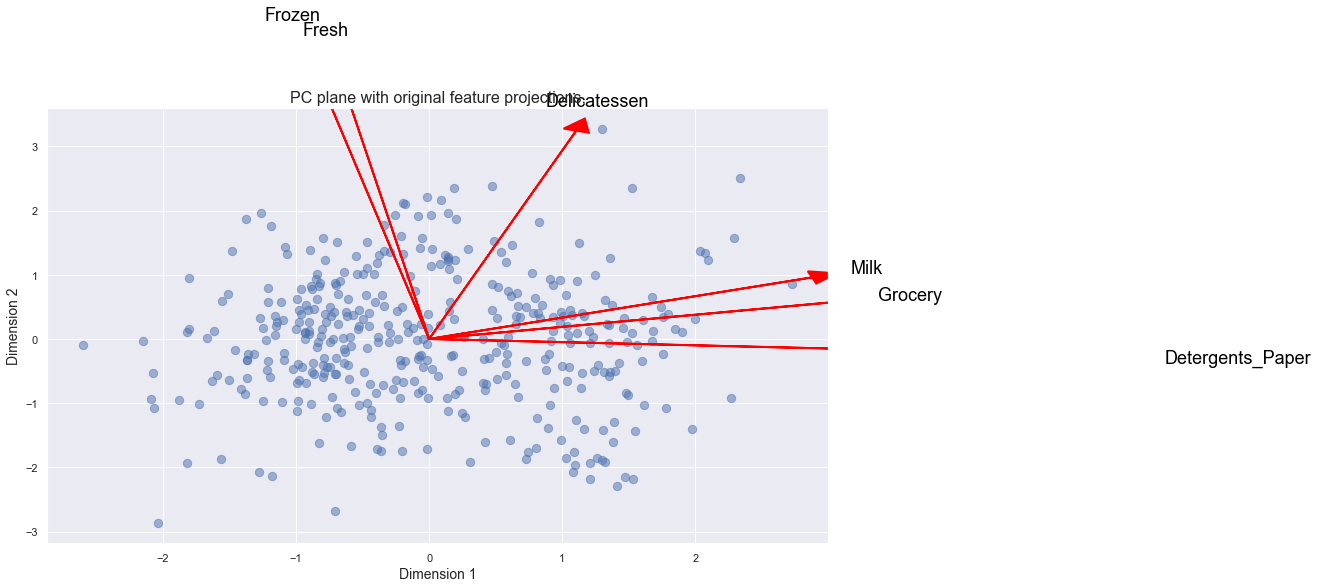

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

### Observação

Assim que tivermos as projeções do recurso original (em vermelho), será mais fácil interpretar a posição relativa de cada ponto de dados no gráfico de dispersão. Por exemplo, um ponto no canto inferior direito da figura provavelmente corresponderá a um cliente que gasta muito em `'Milk'`, `'Grocery'` e `'Detergents_Paper'`, mas não tanto nas outras categorias de produtos. .

A partir do biplot, quais das características originais estão mais fortemente correlacionadas com o primeiro componente? E aqueles que estão associados ao segundo componente? Estas observações concordam com o gráfico pca_results que você obteve anteriormente?

As características originais estão mais fortemente correlacionadas com o primeiro componente são Milk e Grocery, pois a projeção desses vetores em dimensão 1 é maior, as outras características estão mais associadas ao segundo componente, pelo mesmo motivo, essas observações concordam com o gráfico pca_results obtida anteriormente.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Clustering

Nesta seção, você escolherá usar um algoritmo de clustering K-Means ou um algoritmo de clustering Gaussian Mixture Model para identificar os vários segmentos de clientes ocultos nos dados. Em seguida, você recuperará pontos de dados específicos dos clusters para entender seu significado, transformando-os novamente em sua dimensão e escala originais.


### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

**Hint:** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

### Pergunta 6

* Quais são as vantagens de usar um algoritmo de clustering K-Means?
* Quais são as vantagens de usar um algoritmo de clustering Gaussian Mixture Model?
* Dadas as suas observações sobre os dados do cliente no atacado até o momento, qual dos dois algoritmos você usará e por quê?

**Dica:** Pense na diferença entre os clusters mais próximos ou mais isolados, e quais seriam apropriados para o nosso conjunto de dados.


**Answer:**

1) As vantagens de usar um algoritmo de clustering K-Means são:

Ser relativamente escalável e eficiente para grandes conjuntos de dados. O método freqüentemente termina num
local ótimo. Entretanto, este método só pode ser aplicado quando a média (centróide) de
um cluster pode ser definido. Isto pode não ser o caso em algumas aplicações, que
utilizam dados com atributos categóricos (nominais) estão envolvidos. BERKHIN
(2002) comenta que a abordagem por k-means é sensível à partição inicial, gerada pela
escolha aleatória dos centróides.A técnica k-means necessita que número k de clusters
seja informado com antecedência. 

2) As vantagens de usar um algoritmo de clustering Gaussian Mixture Model são:

Soft clustering - criam associações de agrupamentos multiplos, útil em casos que queremos que uma amostra faça parte de múltiplas categorias, pelo ótimo desempenho e pelas demais vantagens citadas acima, além de ser adequado a esse conjunto de dados.

3) O ideal seria usar o DBSCAN, mas dadas as minhas observações sobre o conjunto de dados do cliente no atacado até o momento, eu usaria o K-Means, apesar de um cliente poder fazer parte de múltiplas categorias ao mesmo tempo

referências:
http://cursos.eldman.com.br/pluginfile.php/3848/mod_resource/content/10/Clusterizacao%20K%20means%20Uma%20Proposta%20de%20Melhoria.pdf

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.
   
### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera estar nos dados já pode ser conhecido. Quando o número de clusters não é conhecido *a priori*, não há garantia de que um determinado número de clusters segmenta melhor os dados, uma vez que não está claro qual estrutura existe nos dados - se houver. No entanto, podemos quantificar a "bondade" de um agrupamento calculando o coeficiente de silhueta *de cada ponto de dados*. O [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dados mede a semelhança de seu cluster atribuído de -1 (diferente) a 1 (similar). O cálculo da *média* do coeficiente da silhueta fornece um método de pontuação simples de um determinado clustering.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Ajuste um algoritmo de clustering ao `reduced_data` e atribua-o ao` clusterer`.
 - Preveja o cluster para cada ponto de dados em `reduced_data` usando` clusterer.predict` e atribua-os a `preds`.
 - Encontre os centros de cluster usando o respectivo atributo do algoritmo e atribua-os a `centers`.
 - Preveja o cluster para cada ponto de dados de amostra em `pca_samples` e atribua-os` sample_preds`.
 - Importe `sklearn.metrics.silhouette_score` e calcule a pontuação da silhueta de `reduced_data` em relação `preds`.
   - Atribuir a pontuação da silhueta para "pontuação" e imprimir o resultado.

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# TODO: Aplique seu algoritmo de clusterização de escolha aos dados reduzidos
n_components=4
clusterer = KMeans(n_clusters=n_components, random_state=0).fit(reduced_data)

# TODO: prever o cluster para cada ponto de dados
preds = clusterer.predict(reduced_data)

# TODO: encontre os centros do cluster
centers = clusterer.cluster_centers_ 

# TODO: Preveja o cluster para cada ponto de dados de amostra transformado
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcular o coeficiente de silhueta médio para o número de clusters escolhidos
score = silhouette_score(reduced_data,preds)

print('A pontuação foi de: ',score)

A pontuação foi de:  0.3783534909145291


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

### Pergunta 7

* Relate a pontuação da silhueta para vários números de cluster que você tentou.
* Destes, qual número de clusters tem o melhor escore de silhueta?


**Answer:**
Os valores para o números de cluster com suas respectivas pontuação da silhueta são:

n_clusteres - pontuação da silhueta

2 - 0.3735

3 - 0.3677

4 - 0.3783

5 - 0.3545

6 - 0.3568

7 - 0.3576

8 - 0.3726

9 - 0.3563

10 - 0.3466

Nota-se que a maior pontuação da silhueta é pra quando o numero de clusteres é igual a 4.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

### Visualização de clusters
Depois de escolher o número ideal de clusters para o seu algoritmo de clustering usando a métrica de pontuação acima, você pode visualizar os resultados executando o bloco de código abaixo. Observe que, para fins de experimentação, você pode ajustar o número de clusters para o seu algoritmo de clustering para ver várias visualizações. A visualização final fornecida deve, no entanto, corresponder ao número ideal de clusters.

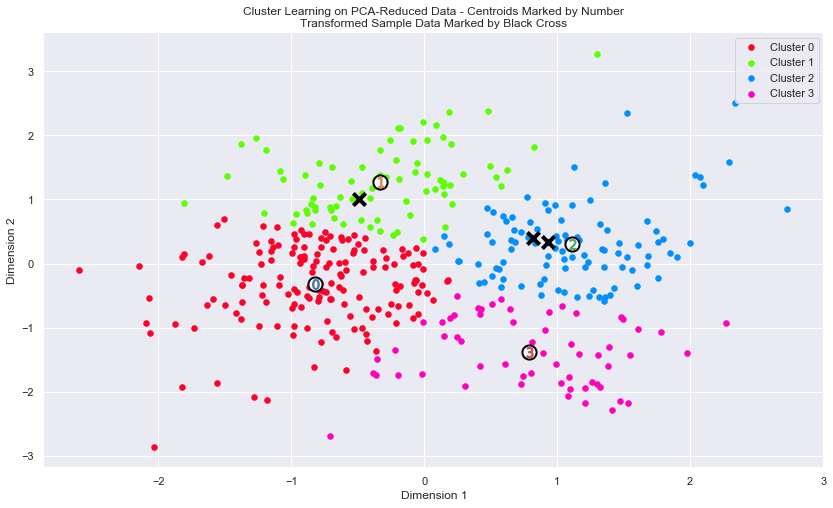

In [18]:
# Display the results of the clustering from implementation
# Exibe os resultados do clustering da implementação
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.

### Implementação: Recuperação de Dados
Cada cluster presente na visualização acima possui um ponto central. Esses centros (ou meios) não são especificamente pontos de dados dos dados, mas sim as *médias* de todos os pontos de dados previstos nos respectivos clusters. Para o problema de criar segmentos de clientes, o ponto central de um cluster corresponde a *o cliente médio desse segmento*. Como os dados atualmente são reduzidos em dimensão e dimensionados por um logaritmo, podemos recuperar os gastos representativos do cliente desses pontos de dados aplicando as transformações inversas.

No bloco de código abaixo, você precisará implementar o seguinte:
  - Aplique a transformação inversa em `centers` usando `pca.inverse_transform` e atribua os novos centros a `log_centers`.
  - Aplique a função inversa de `np.log` a `log_centers` usando `np.exp` e atribua os verdadeiros centros a` true_centers`.


In [19]:
# TODO: Inversa transformar os centros
log_centers = pca.inverse_transform(centers)

# TODO: exponencial os centros
true_centers = np.exp(log_centers)

# Exibe os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,6852.0,1599.0,2059.0,1581.0,254.0,564.0
Segment 1,23079.0,3239.0,3877.0,5508.0,497.0,1813.0
Segment 2,7797.0,8947.0,12906.0,1638.0,4796.0,1550.0
Segment 3,2099.0,5024.0,7953.0,420.0,3212.0,485.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

### Questão 8

* Considere o custo total de compra de cada categoria de produto para os pontos de dados representativos acima e faça referência à descrição estatística do conjunto de dados no início deste projeto (analisando especificamente os valores médios dos vários pontos de recurso). Que conjunto de estabelecimentos poderia representar cada um dos segmentos de clientes?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de recursos '`Segmento X'`. Pense no que cada segmento representa em termos de seus valores para os pontos de recurso escolhidos. Faça referência a esses valores com os valores médios para obter alguma perspectiva sobre o tipo de estabelecimento que eles representam.


**Answer:**

Os clientes farão parte de um determinado segmento, se seus valores médios dos vários pontos de recurso são maiores que os da média do conjunto de dados no início deste projeto, seguindo essa lógica, podemos agrupar os clientes da seguinte forma:

Estranhamente nenhum cliente faz parte do segmento 0.

Os clientes Frash,Frozen e Delicatessen poderiam fazer parte do segmento 1.

Os clientes Milk,Grocery, Detergents_Paper e Delicatessen poderiam fazer parte do segmento 2.

Os clientes Grocery e Detergents_Paper poderiam fazer parte do segmento 3.


### Question 9

*For each sample point, which customer segment from* **Question 8** *best represents it?*
*Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

### Pergunta 9

*Para cada ponto de amostra, qual segmento de cliente de* **Questão 8** *representa melhor?*
* As previsões para cada ponto de amostra são consistentes com isso?

Execute o bloco de código abaixo para descobrir qual cluster cada ponto de amostragem é previsto.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2


**Answer:**
A amostra 0 possui os produtos milk, grocery, detergents paper e delicatessen com média maior que os da descrição estatística do conjunto de dados no início deste projeto, portanto deve pertener ao cluster 2

A amostra 1 possui os produtos fresh, frozen e delicatessen com média maior que os da descrição estatística do conjunto de dados no início deste projeto, portanto deve pertener ao cluster 1

A amostra 2 possui os produtos grocery, detergents paper e delicatessen com média maior que os da descrição estatística do conjunto de dados no início deste projeto, portanto assemelha-se melhor ao cluster 2

Portanto, a análise das previsões dos clusteres, para cada ponto de amostra são consistentes com o código acima

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

## Conclusão

Nesta seção final, você investigará maneiras de usar os dados em cluster. Primeiro, você considerará como os diferentes grupos de clientes, os ***segmentos de clientes***, podem ser afetados de maneira diferente por um esquema de entrega específico. Em seguida, você considerará como atribuir um rótulo a cada cliente (ao qual *segmento* esse cliente pertence) pode fornecer recursos adicionais sobre os dados do cliente. Por fim, você comparará os ***segmentos de clientes*** com uma variável oculta presente nos dados, para ver se o agrupamento identificou determinados relacionamentos.


### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

*How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

### Questão 10
As empresas geralmente executam [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas alterações em seus produtos ou serviços para determinar se essa alteração afetará seus clientes de forma positiva ou negativa. O distribuidor atacadista está considerando mudar seu serviço de entrega de atualmente 5 dias por semana para 3 dias por semana. No entanto, o distribuidor só fará essa mudança no serviço de entrega para os clientes que reagirem positivamente.

*Como o distribuidor atacadista pode usar os segmentos de clientes para determinar quais clientes, se houver, reagiriam positivamente à mudança no serviço de entrega?*

**Dica:** Podemos presumir que a mudança afeta todos os clientes igualmente? Como podemos determinar qual grupo de clientes afeta mais?


**Answer:** Qualquer cluster de clientes que possua categorias de produtos que são perecíveis como fresh e milk provevelmente reagiriam negativamente a mudança, enquanto que outras categorias isso provavelmente não acontecerá, portanto os clientes dos clusters 1 e 2 reagiriam negativamente, enquanto que os demais reagiriam positivamente

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

### Pergunta 11
Estrutura adicional é derivada de dados originalmente não rotulados ao usar técnicas de clustering. Como cada cliente tem um ***segmento de cliente*** que melhor identifica com (dependendo do algoritmo de clustering aplicado), podemos considerar *'segmento de cliente'* como um recurso **de engenharia** para os dados. Suponha que o distribuidor atacadista adquiriu recentemente dez novos clientes e forneceu estimativas para o gasto anual antecipado de cada categoria de produto. Conhecendo essas estimativas, o distribuidor atacadista quer classificar cada novo cliente para um segmento ***de clientes*** para determinar o serviço de entrega mais adequado.
* Como o distribuidor atacadista pode rotular os novos clientes usando apenas seus gastos estimados com produtos e os dados do **segmento do cliente**?

**Dica:** Um modelo supervisionado pode ser usado para treinar os clientes originais. Qual seria a variável alvo?

**Answer:**
Após treinar o modelo com os dados dos clientes originais, basta usar o modelo para fazer previsões com base nos seus gastos estimados com produtos, e assim determinar a qual segmento de cliente ele deve pertencer, de acordo com o exemplo abaixo, que prevê que um certo cliente faz parte do cluster 2:

In [33]:
client=[[0.9234,0.6357]]
cluster = clusterer.predict(client)
print(cluster)

[2]


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.


### Visualizando Distribuições Subjacentes

No início deste projeto, foi discutido que os recursos `'Channel'` e`' Region'` seriam excluídos do conjunto de dados para que as categorias de produtos do cliente fossem enfatizadas na análise. Ao reintroduzir o recurso `'Channel'` no conjunto de dados, uma estrutura interessante surge quando se considera a mesma redução de dimensionalidade do PCA aplicada anteriormente ao conjunto de dados original.

Execute o bloco de código abaixo para ver como cada ponto de dados é rotulado `'HoReCa'` (Hotel / Restaurante / Café) ou`'Retail'` o varejo. Além disso, você encontrará os pontos de amostra circulados na plotagem, que identificarão sua rotulagem.

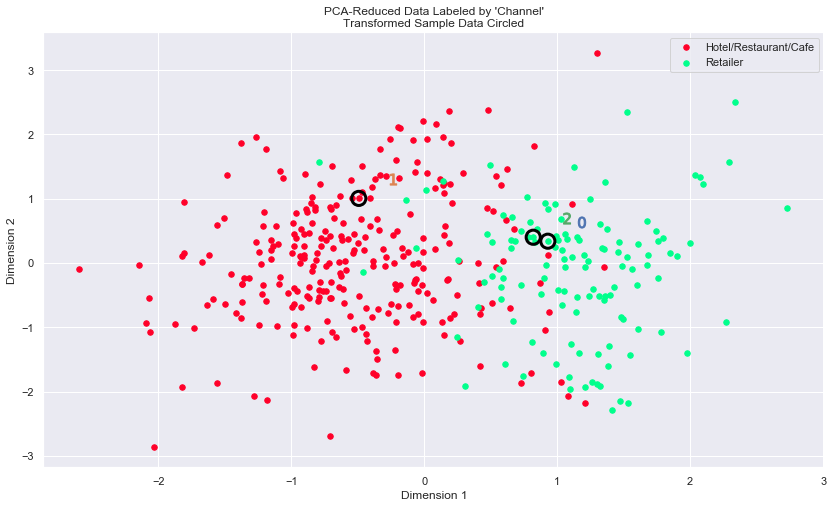

In [34]:
# Display the clustering results based on 'Channel' data
# Exibe os resultados de clustering com base nos dados de 'Canal'
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

### Pergunta 12

* Quão bem o algoritmo de clustering e o número de clusters que você escolheu se comparam a esta distribuição subjacente de clientes de Hotel / Restaurante / Café para clientes de varejistas?
* Existem segmentos de clientes que seriam classificados como 'Retalhistas' ou 'Hotéis / Restaurantes / Cafés' por esta distribuição?
* Você consideraria essas classificações consistentes com sua definição anterior dos segmentos de clientes?

**Answer:** 

1) O algoritmo de clustering e o número de clusters que escolhi se comparam muito bem a esta distribuição subjacente.

2) Comparando as distribuições fica fácil perceber que o segmento de cliente 1 pode ser classificado como Hotéis/Restaurantes/Cafés enquanto que os segmentos 2 e 3 podem ser classificados como clientes de varejistas.

4) Sim, eu considero essas classificações consistentes com os dados anteriores dos segmentos de clientes, pois ao comparar as duas distribuições, percebe-se que o cluster se encaixam muito bem com os 2 clusteres dessa nova distribuição.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

> **Observação**: Depois de concluir todas as implementações de código e responder com êxito a cada pergunta acima, você poderá finalizar seu trabalho exportando o iPython Notebook como um documento HTML. Você pode fazer isso usando o menu acima e navegando para
**Arquivo -> Download como -> HTML (.html)**. Inclua o documento final junto com este caderno como sua submissão.
